In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.grid_search import GridSearchCV
from utils import *

In [2]:
train = pd.read_csv('train_dataset.csv')
test = pd.read_csv('test_dataset.csv')

In [3]:
sample = pd.read_csv('sample_submission.csv')

In [7]:
dt_stump = DecisionTreeClassifier(max_depth=4, min_samples_leaf=1)
adc = AdaBoostClassifier(
    base_estimator=dt_stump,
    learning_rate=1,
    n_estimators=400,
    algorithm="SAMME")
insample_scores = []
outsample_scores = []
insample_evaluates = []
outsample_evaluates = []
com_cats = []
for rid, com_range in enumerate(full_ranges[1:]):
    print(rid)
    col_ids = list_sum(x[1] for x in com_range)
    com_cat = string_sum(x[0] for x in com_range)
    errors = get_score_evaluate(
        train.iloc[:, col_ids].values,
        train.loc[:, 'fault_severity'].values,
        adc,
        random_state=487)
    insample_scores.append(errors[0])
    outsample_scores.append(errors[1])
    insample_evaluates.append(errors[2])
    outsample_evaluates.append(errors[3])
    com_cats.append(com_cat)
res = pd.DataFrame(
    {'insample_scores': insample_scores, 
     'outsample_scores': outsample_scores,
     'insample_evaluates': insample_evaluates,
     'outsample_evaluates': outsample_evaluates}, index=com_cats)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.01 µs
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


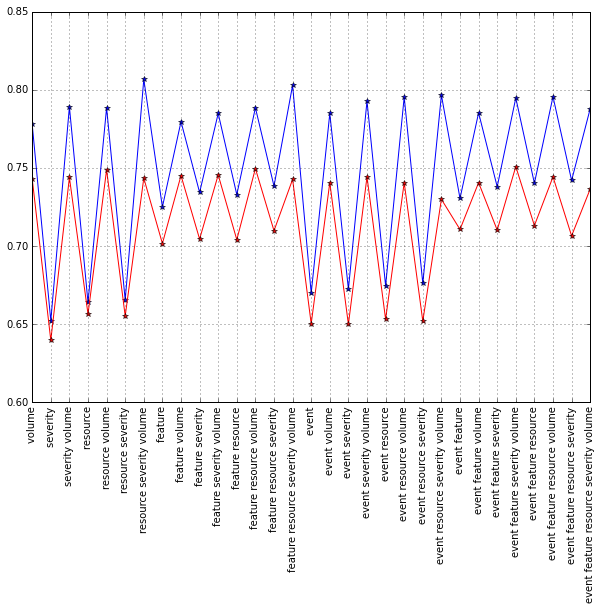

In [8]:
plt.figure(figsize=(10, 7))
ax = plt.subplot(111)
res.loc[:, 'insample_scores'].plot(kind='line', ax=ax, rot=90, marker='*')
res.loc[:, 'outsample_scores'].plot(kind='line', ax=ax, color='r', rot=90, marker='*')
plt.xticks(range(len(res.index)), res.index)
plt.grid()
plt.show()

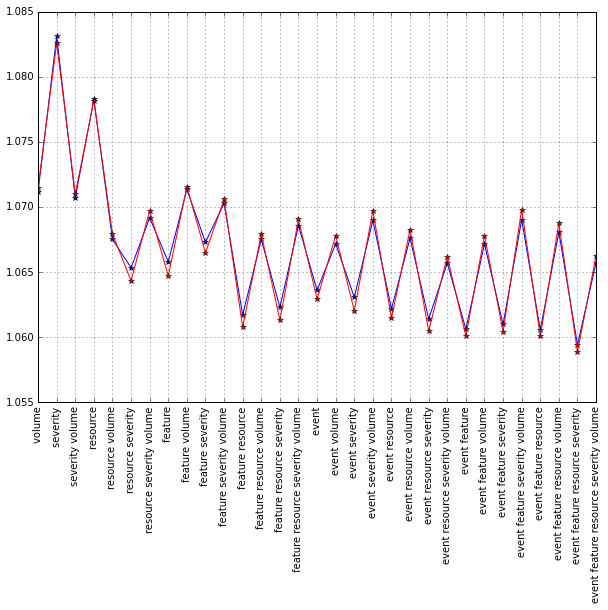

In [9]:
plt.figure(figsize=(10, 7))
ax = plt.subplot(111)
res.loc[:, 'insample_evaluates'].plot(kind='line', ax=ax, rot=90, marker='*')
res.loc[:, 'outsample_evaluates'].plot(kind='line', ax=ax, color='r', rot=90, marker='*')
plt.xticks(range(len(res.index)), res.index)
plt.grid()
plt.show()

In [12]:
adc.fit(
    train
    .iloc[
        :, 
        list(range(train_event_start, train_event_end)) +
        list(range(train_feature_start, train_feature_end)) +
        list(range(train_resource_start, train_resource_end)) +
        list(range(train_severity_start, train_severity_end))
        ], 
    train.loc[:, 'fault_severity'])

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            random_state=None, splitter='best'),
          learning_rate=1, n_estimators=400, random_state=None)

In [13]:
prob = adc.predict_proba(
    test
    .iloc[
        :, 
        list(range(train_event_start, train_event_end)) +
        list(range(train_feature_start, train_feature_end)) +
        list(range(train_resource_start, train_resource_end)) +
        list(range(train_severity_start, train_severity_end))
        ])

In [14]:
adc_prob = pd.DataFrame({
    'id': sample.loc[:, 'id'].values, 
    'predict_0': prob[:, 0],
    'predict_1': prob[:, 1],
    'predict_2': prob[:, 2]})

In [15]:
adc_prob.head()

,id,predict_0,predict_1,predict_2
0,11066,0.346669,0.348586,0.304745
1,18000,0.342459,0.339131,0.318411
2,16964,0.351307,0.344032,0.304660
3,4795,0.348055,0.335206,0.316739
4,3392,0.341696,0.341028,0.317277


In [16]:
adc_prob.to_csv('adc.csv', index=False)